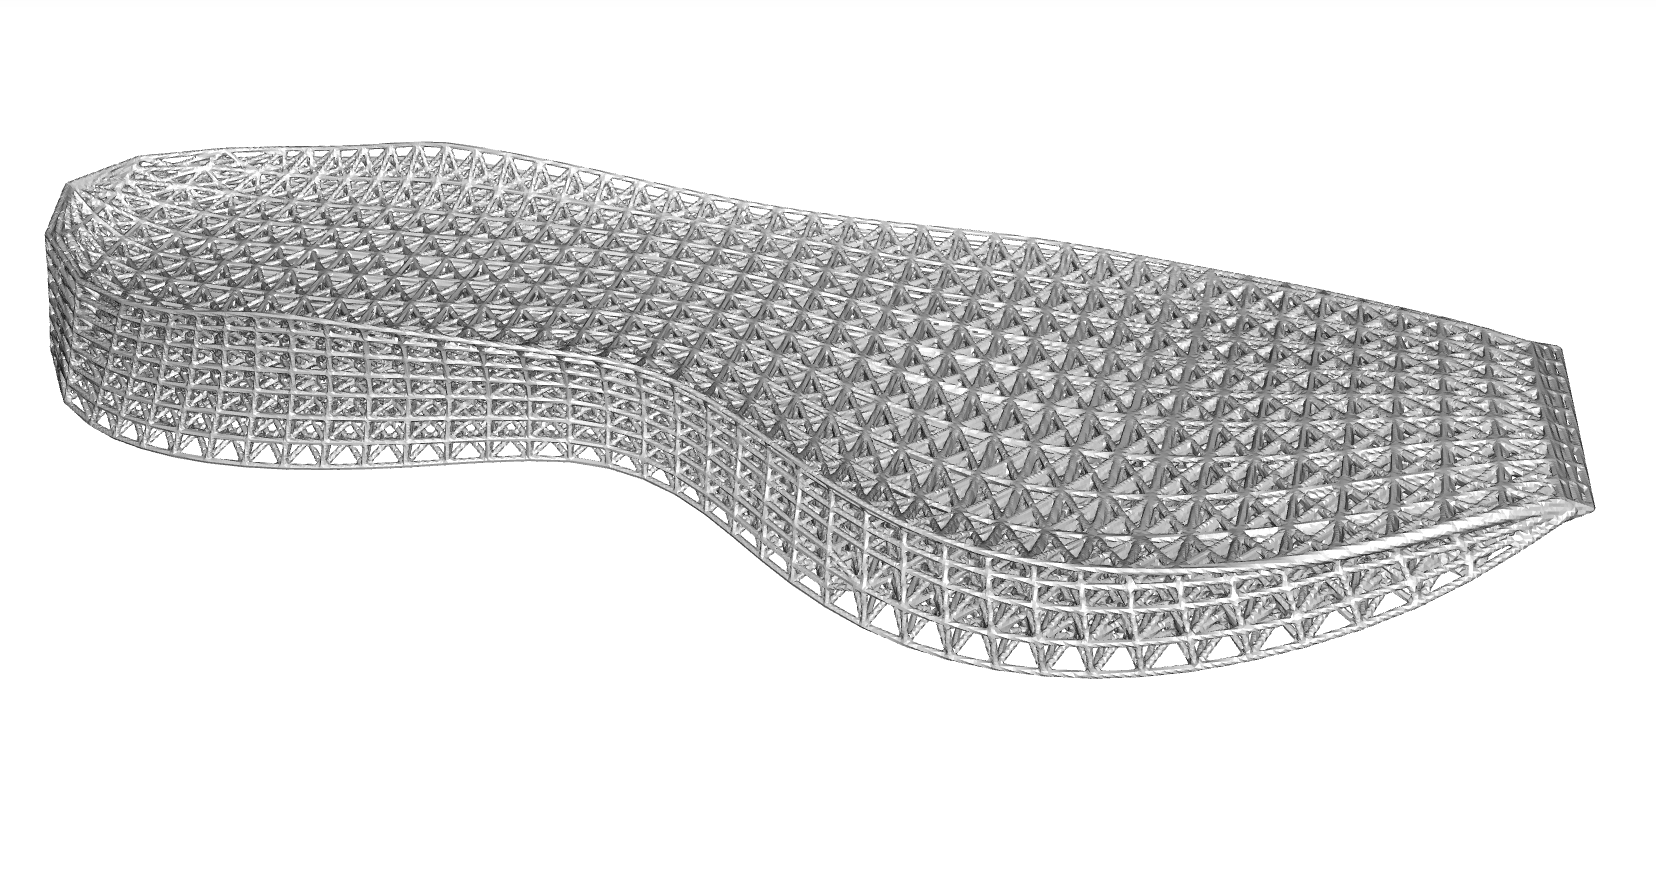

In [1]:
import genysis
token = "Space0ut!"

Welcome to GENYSIS


In [2]:
cell_0 = 'cell_0.obj'
cell_1 = 'cell_1.obj'

genysis.genLatticeUnit(case=3,chamfer=0,centerChamfer=0,bendIn=0,cBendIn=0,connectPt=0,output=cell_0,token=token)
genysis.genLatticeUnit(case=3,chamfer=1,centerChamfer=0,bendIn=0,cBendIn=0,connectPt=0,output=cell_1,token=token)

genysis.upload("models/soleBot.igs", "soleBot.igs", token)
genysis.upload("models/soleTop.igs", "soleTop.igs", token)
genysis.upload("models/soleSide1.igs", "soleSide1.igs", token)
genysis.upload("models/soleSide2.igs", "soleSide2.igs", token)

request:  {"case": 3, "chamfer": 0, "centerChamfer": 0, "bendIn": 0, "cBendIn": 0, "connectPt": 0, "filename": "cell_0.obj", "t": "Space0ut!"}
response:  ["cell_0.obj"]
request:  {"case": 3, "chamfer": 1, "centerChamfer": 0, "bendIn": 0, "cBendIn": 0, "connectPt": 0, "filename": "cell_1.obj", "t": "Space0ut!"}
response:  ["cell_1.obj"]
uploading file size: 0.735 MB
[==================================================]100%
successfully uploaded models/soleBot.igs as soleBot.igs
uploading file size: 0.735 MB
[==================================================]100%
successfully uploaded models/soleTop.igs as soleTop.igs
uploading file size: 3.644 MB
[==================================================]100%
successfully uploaded models/soleSide1.igs as soleSide1.igs
uploading file size: 0.366 MB
[==================================================]100%
successfully uploaded models/soleSide2.igs as soleSide2.igs


{'message': 'soleSide2.igs uploaded to public/soleSide2.igs'}

In [4]:
soleLat = genysis.conformalLattice()
soleLat.setEPSILON(0.1)
soleLat.setSurfaces(top='soleTop.igs', bottom='soleBot.igs', side1='soleSide1.igs', side2='soleSide2.igs')

soleLat.setUVW(40,8,10)
soleLat.setGridOutput("soleGrid.json")
soleLat.setComponent(cell_0)

soleLat.addMerge({
    'mergeSt': [29,2,5], #THE START INDICATES THE STARTING POINT (in terms of the UVW grid) OF THE 'LINE' THAT CELLS WILL MERGE TO.
    'mergeEn': [39,2,5], #THE END INDICATES THE ENDING POINT (in terms of the UVW grid) OF THE 'LINE' THAT THE CELLS WILL MERGE TO.
    'mergeDir': 2, #THE DIRECTION (U=0 , V=1, W=2) IN WHICH CELLS WILL MERGE 
    'mergeRange': [0,2,1], #THE RANGE COLUMNS/ROWS CELLS AFFECTED BY THE MERGE IN THE U,V,W DIRECTIONS
    'mergeLimit': 20, #out of date variable
    'restrictions': [True,False,True] #WHETHER OR NOT THE FIRST AND LAST ROWS IN THE U,V,W DIRECTIONS WILL BE INCLUDED IN THE MERGE
})

soleLat.addMerge({
    'mergeSt': [0,2,5],
    'mergeEn': [10,2,5],
    'mergeDir': 2,
    'mergeRange': [0,2,1],
    'mergeLimit': 20, 
    'restrictions': [True,False,True]
})


soleLat.addMerge({
    'mergeSt': [0,2,4],
    'mergeEn': [15,2,4],
    'mergeDir': 1,
    'mergeRange': [0,1,5],
    'mergeLimit': 20,
    'restrictions': [True,True,False]
})

soleLat.genGrid(token)
out_file_name = 'soleConformalLattice_0.obj'

soleLat.setOutput(out_file_name)
soleLat.populateLattice(token)

genysis.visualize(out_file_name,token,True)

request:  {"u": 40, "v": 8, "w": 10, "top": "soleTop.igs", "bottom": "soleBot.igs", "side1": "soleSide1.igs", "side2": "soleSide2.igs", "filename": "soleGrid.json", "merges": [{"mergeSt": [29, 2, 5], "mergeEn": [39, 2, 5], "mergeDir": 2, "mergeRange": [0, 2, 1], "mergeLimit": 20, "restrictions": [true, false, true]}, {"mergeSt": [0, 2, 5], "mergeEn": [10, 2, 5], "mergeDir": 2, "mergeRange": [0, 2, 1], "mergeLimit": 20, "restrictions": [true, false, true]}, {"mergeSt": [0, 2, 4], "mergeEn": [15, 2, 4], "mergeDir": 1, "mergeRange": [0, 1, 5], "mergeLimit": 20, "restrictions": [true, true, false]}], "t": "Space0ut!", "output": "soleGrid.json"}
response:  ["soleGrid.json"]

request:  {"boxes": "soleGrid.json", "component": "cell_0.obj", "filename": "soleConformalLattice_0.obj", "t": "Space0ut!", "blendTargets": [], "EPSILON": 0.1}
response:  ["soleConformalLattice_0.obj"]
https://studiobitonti.appspot.com/apps/visualize?name=soleConformalLattice_0.obj&t=Space0ut!


'https://studiobitonti.appspot.com/apps/visualize?name=soleConformalLattice_0.obj&t=Space0ut!'

In [5]:
finalLattice = "soleLattice.obj"

genysis.marchingCube(out_file_name,600,.6,finalLattice,token)

# genysis.download(src=finalLattice,dest= finalLattice,token=token)
genysis.visualize(finalLattice,token,True)

request:  {"lines": "soleConformalLattice_0.obj", "resolution": 600, "memberThickness": 0.6, "filename": "soleLattice.obj", "t": "Space0ut!"}
response:  ["soleLattice.obj"]
https://studiobitonti.appspot.com/apps/visualize?name=soleLattice.obj&t=Space0ut!


'https://studiobitonti.appspot.com/apps/visualize?name=soleLattice.obj&t=Space0ut!'